In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\diabetes.csv")

In [72]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size = 0.2, random_state = 23)

In [76]:
X_train.shape

(614, 8)

In [4]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.5 MB/s eta 0:00:00


In [5]:
# light GBM

In [77]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)

In [79]:
lgm_params = {
    'learning_rate':0.5, "boosting_type": "gbdt", # try dart for
    'objective':'binary',
    'metric':['auc','binary_logloss'],
    'num_leaves':100,
    'max_depth':10
}

In [80]:
from datetime import datetime
start = datetime.now()
#clf = lgb.train(params = lgm_params, d_train,num_boost_round = 50)
clf = lgb.train(lgm_params, d_train, num_boost_round=200)
stop = datetime.now()
execution_time_lgbm = stop-start

[LightGBM] [Info] Number of positive: 215, number of negative: 399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350163 -> initscore=-0.618323
[LightGBM] [Info] Start training from score -0.618323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [81]:
execution_time_lgbm

datetime.timedelta(microseconds=95535)

In [82]:
# predcition on test data
y_pred_lgbm = clf.predict(X_test)

In [83]:
y_pred_lgbm

array([1.91197093e-06, 1.00000000e+00, 8.99218320e-01, 2.09319499e-07,
       6.84968638e-06, 9.32079174e-01, 9.98815232e-01, 5.62232390e-04,
       3.84649452e-05, 9.99999119e-01, 8.94172151e-03, 1.58113413e-10,
       3.60380692e-03, 9.99919991e-01, 4.32862236e-11, 9.99996872e-01,
       2.78270965e-05, 4.19243210e-11, 9.83243647e-04, 3.70982999e-03,
       2.22999694e-02, 9.99889041e-01, 7.89370388e-02, 9.99997780e-01,
       6.48400041e-01, 3.69203430e-04, 4.33993545e-11, 1.36762466e-11,
       7.98808869e-10, 5.84825201e-01, 5.37154494e-12, 3.88540996e-06,
       7.17855405e-01, 1.98445992e-03, 1.23879808e-03, 1.05181903e-03,
       1.04638082e-03, 9.94106097e-01, 6.80968914e-03, 1.73104693e-01,
       5.40750456e-04, 9.99848397e-01, 2.66803394e-06, 5.87889921e-03,
       2.68533075e-08, 9.99994672e-01, 2.93445905e-04, 9.99999776e-01,
       9.99846760e-01, 7.99875805e-02, 1.64033086e-03, 7.88261724e-05,
       4.64215124e-10, 9.99999875e-01, 2.01574229e-06, 1.45033661e-08,
      

In [84]:
# convert into binary values 0/1 for classifaction
for i in range(0,X_test.shape[0]):
    if y_pred_lgbm[i]>= .5:        #setting thresold to.5
        y_pred_lgbm[i]=1

    else:
        y_pred_lgbm[i]=0


<Axes: >

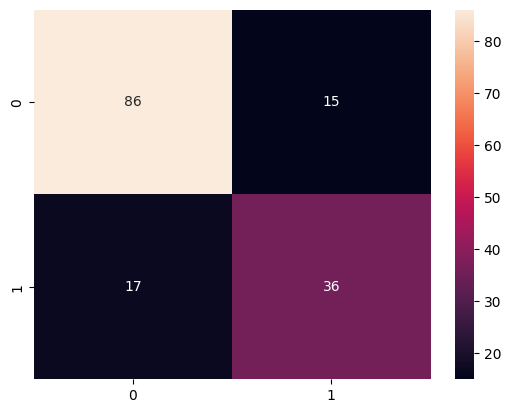

In [85]:
from sklearn.metrics import confusion_matrix ,accuracy_score
import seaborn as sns

cm_lgbm = confusion_matrix(y_test,y_pred_lgbm)
sns.heatmap(cm_lgbm,annot=True)

In [86]:
accuracy_score(y_test,y_pred_lgbm)

0.7922077922077922

In [87]:
#from  xgboost import XGBClassifier

In [88]:
import xgboost as xgb
dtrain=xgb.DMatrix(X_train,y_train)

In [89]:
#setting the parameters for xgboost
parameters ={
    'max_depth':10,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'learning_rate':.05
}

In [90]:
xg = xgb.train(parameters,dtrain,50)

In [91]:
d_test = xgb.DMatrix(X_test)
y_pred_xg = xg.predict(d_test)

In [92]:
for i in range(0,X_test.shape[0]):
    if y_pred_xg[i]>= 0.5:
        y_pred_xg[i] = 1

    else:
        y_pred_xg[i] =0

In [93]:
y_pred_xg

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1.], dtype=float32)

<Axes: >

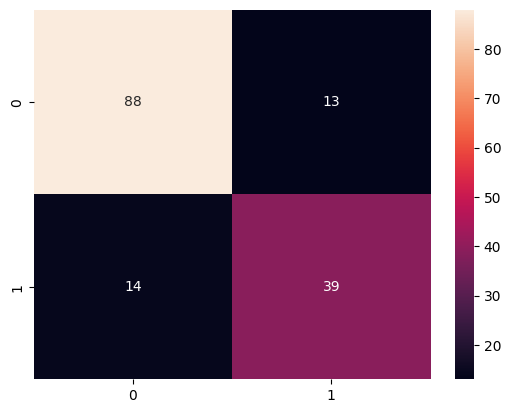

In [94]:
cm_xg = confusion_matrix(y_test,y_pred_xg)
sns.heatmap(cm_xg,annot=True)

In [95]:
accuracy_score(y_test,y_pred_xg)

0.8246753246753247

In [96]:
accuracy_score(y_test,y_pred_lgbm)

0.7922077922077922